In [1]:
import json

In [2]:
!grep 'seed' gpt2_gene_multiv2_ft_ko.json > gpt2_gene_multiv2_ft_ko.jsonl

In [3]:
filename = "gpt2_gene_multiv2_ft_ko.jsonl"
data_list = []
for line in open(filename):
    data = json.loads(line)
    data_list.append(data)
    

In [4]:
# 假设您的数据存储在一个名为data_list的列表中
# 初始化一个字典来保存每个键的最大accuracy值
max_accuracies = {}
dna_protein_pair_full_list = []
dna_protein_pair_rand_full_list = []

# 遍历列表中的每个字典
for data in data_list:
    for key, metrics in data.items():
        if key not in ['seed']:  # 忽略非目标键，例如'seed'
            if isinstance(metrics, dict) and 'accuracy' in metrics:
                accuracy = metrics['accuracy']
                if accuracy<0.5:
                    accuracy = 1 - accuracy
                    
                if "dna_protein_pair_full"==key:
                    dna_protein_pair_full_list.append(accuracy)

                if "dna_protein_pair_rand_full"==key:
                    dna_protein_pair_rand_full_list.append(accuracy)

                                    
                if key not in max_accuracies or accuracy > max_accuracies[key]:
                    max_accuracies[key] = accuracy

# 打印每个键的最大accuracy值
for key, max_accuracy in max_accuracies.items():
    print(f"{key}: {max_accuracy}")

dna_protein_pair_full: 0.6775
dna_protein_pair_rand_full: 0.63375


In [5]:
#!pip install matplotlib seaborn

Text(0, 0.5, 'Frequency')

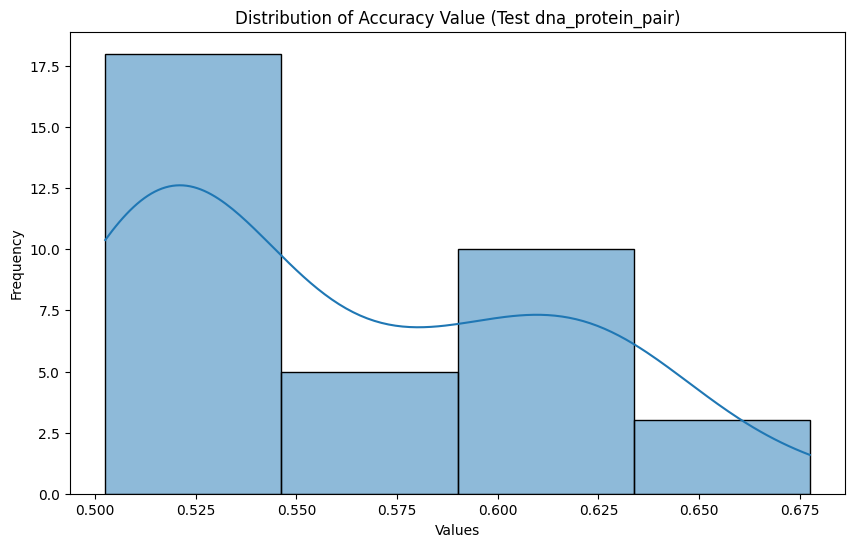

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设这是你的列表
#dna_protein_pair_rand_full_list = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]  # 示例数据

# 使用Freedman-Diaconis规则自动确定bin的数量
bins = np.histogram_bin_edges(dna_protein_pair_full_list, bins='fd')

# 设置图形大小
plt.figure(figsize=(10, 6))

# 使用seaborn绘制直方图
sns.histplot(data=dna_protein_pair_full_list, bins=bins, kde=True)

# 添加标题和轴标签
plt.title('Distribution of Accuracy Value (Test dna_protein_pair)')
plt.xlabel('Values')
plt.ylabel('Frequency')

# 显示图形

Text(0, 0.5, 'Frequency')

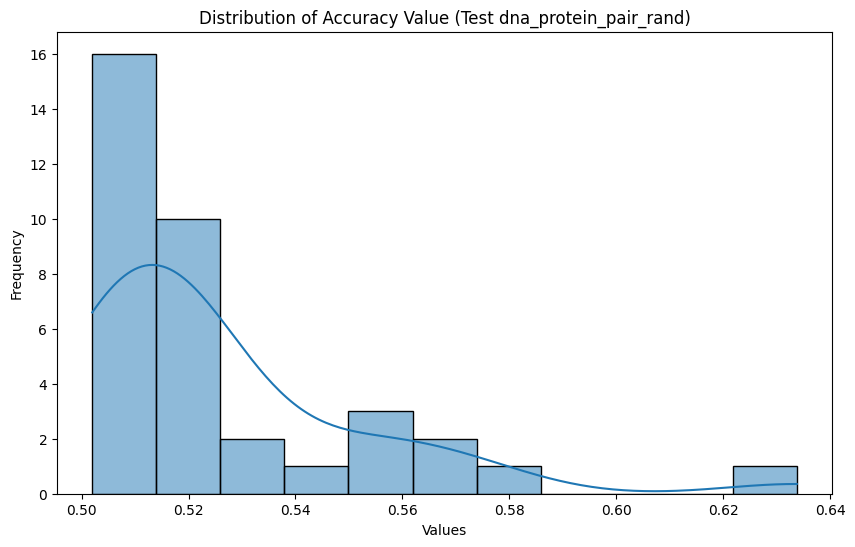

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设这是你的列表
#dna_protein_pair_rand_full_list = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]  # 示例数据

# 使用Freedman-Diaconis规则自动确定bin的数量
bins = np.histogram_bin_edges(dna_protein_pair_rand_full_list, bins='fd')

# 设置图形大小
plt.figure(figsize=(10, 6))

# 使用seaborn绘制直方图
sns.histplot(data=dna_protein_pair_rand_full_list, bins=bins, kde=True)

# 添加标题和轴标签
plt.title('Distribution of Accuracy Value (Test dna_protein_pair_rand)')
plt.xlabel('Values')
plt.ylabel('Frequency')

# 显示图形

In [8]:
import numpy as np

# 示例数据（Python list，包含 float 类型的数值）
data = dna_protein_pair_full_list

# 计算平均值
mean_value = np.mean(data)

# 计算方差（注意：np.var默认计算总体方差，如果需要样本方差，请设置ddof=1）
variance_value = np.var(data)

# 计算标准差
std_value = np.std(data)

print("平均值:", mean_value)
print("方差:", variance_value)
print("标准差:", std_value)

平均值: 0.542962962962963
方差: 0.0017891375171467762
标准差: 0.04229819756380614


In [10]:
count = sum(1 for x in dna_protein_pair_full_list if x >= 0.7)
print("大于0.7的元素个数：", count)

大于0.7的元素个数： 1


In [12]:
len(dna_protein_pair_full_list)

108